In [1]:
import os
import sys
import pprint as pp
import numpy as np
import matplotlib.pyplot as plt

# set the main directory to import qel instruments drivers
sys.path.append(os.getcwd().replace('\\documents\\measure_notebooks',''))
from instruments.Tektronix_AWG5208.TektronixAWG_core import Tektronix_AWG5208
from instruments.Tektronix_AWG5208.TektronixAWG_sequenceEditor import Time_Domain_Sequence
from instruments.Tektronix_AWG5208.plot_tools import *

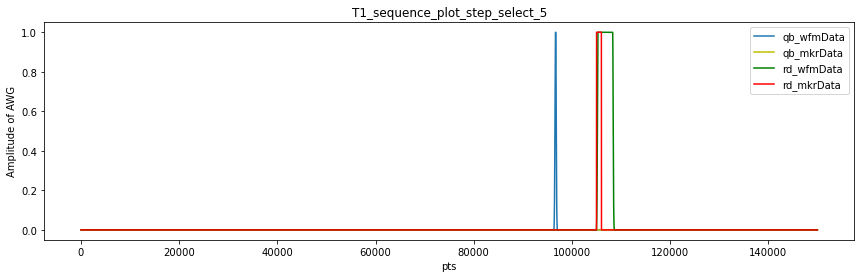

In [2]:
t1seq_obj = Time_Domain_Sequence()
# define the initial condition for generating a T1-sequence

wfm_amount = 51
wfm_totlen = 10000*15
gauss_sig = 100
qubitDrive_delay_time_delta = 2000
# pi pulse
qubitDrive_flat = 55
qubitDrive_mkrDuration = 0
qubitDrive_mkr = 'no_mkr'
readOut_offset =  7000*15
readOut_flat = 3000
readOut_mkrDuration = 1000
readOut_mkr = 'mkr1'

# clean the temporary buffer
store_t1_seq = {}
# set the initial condition for generating a T1-sequence
store_t1_seq = t1seq_obj.gen_T1_seq(wfm_amount,
                             wfm_totlen,
                             gauss_sig,
                             qubitDrive_delay_time_delta,
                             qubitDrive_flat,
                             qubitDrive_mkrDuration,
                             qubitDrive_mkr,
                             readOut_offset,
                             readOut_flat,
                             readOut_mkrDuration,
                             readOut_mkr)
# display the sequence stored structure
# pp.pprint(store_t1_seq)

# plot the pulse shaping in the specified step
seq_name = 'T1_sequence'
step_select = 5
store_time_domain_seq = store_t1_seq
plt_qb_rd(seq_name, step_select, store_time_domain_seq)


In [3]:
inst_name = 'Tektronix_AWG5208'
inst_address = 'TCPIP0::192.168.20.43::inst0::INSTR'
timeout = 10
Clean_Option = True
sample_rate = 1E9
ref_ext = 10E6

# initialize AWG settings
awgClient = Tektronix_AWG5208(inst_name, inst_address, timeout)
awgClient.connect()
if Clean_Option:awgClient.del_wlist();awgClient.del_slist()
awgClient.set_channel_mkr(0,1,0,1,0,0,0,0)
awgClient.set_sample_rate(sample_rate)
awgClient.set_extref_source(ref_ext)

Connect to Tektronix_AWG5208 successfully
Statement: TEKTRONIX,AWG5208,B030598,FV:6.6.0131.0


In [4]:
seq_name = 'T1_Sequence'
track_assign_order = list(store_time_domain_seq.keys())

awgClient.set_sequential_assign_wfm2seqtable(
    seq_name,
    track_assign_order,
    store_time_domain_seq)

The transfer mission is completed.


In [5]:
channel_qb = 1
seq_track_for_qubitDrive = 1
channel_rd = 2
seq_track_for_readOut = 2
awgClient.load_seq_to_channel(channel_qb, seq_name, seq_track_for_qubitDrive)
awgClient.load_seq_to_channel(channel_rd, seq_name, seq_track_for_readOut)

In [6]:
# disconnect the awg
awgClient.disconnect()

Tektronix_AWG5208 has been disconnected by user.
